In [1]:
from fake_models import MessageSql
from fake_config import Settings
from sqlalchemy import create_engine, asc, or_
from sqlalchemy.orm import sessionmaker
import dotenv
import pendulum
import requests
import datetime
import pytz
from datetime import datetime
import numpy as np
import json

settings = Settings(_env_file=dotenv.find_dotenv())
engine = create_engine(settings.db_url.get_secret_value())
Session = sessionmaker(bind=engine)
session = Session()

# CHOOSE DATES FOR TRAINING DATA
start_ms_train = pendulum.datetime(2025,1,10).timestamp()*1000
print("Finding data...")
MESSAGES = session.query(MessageSql).filter(
    MessageSql.from_alias.like(f'%beech%'),
    MessageSql.message_type_name == "report",
    MessageSql.message_persisted_ms >= start_ms_train,
).order_by(asc(MessageSql.message_persisted_ms)).all()
print("Done!")

Finding data...
Done!


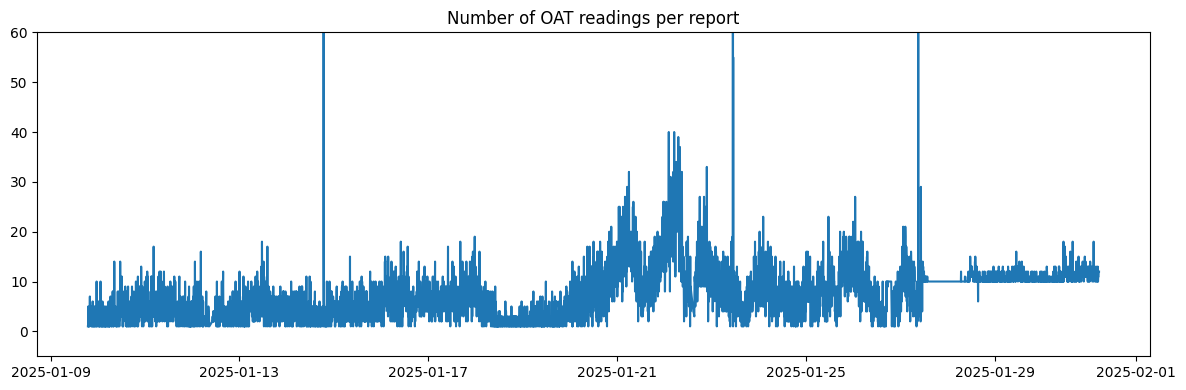

In [6]:
oat_time = []
oat_length = []
payload_length = []
for m in MESSAGES:
    for crl in m.payload['ChannelReadingList']:
        if crl['ChannelName'] == 'oat':
            payload = str(m.payload)
            payload_length.append(len(payload))
            oat_time.append(m.message_persisted_ms)
            oat_length.append(len(crl['ValueList']))

oat_time = [pendulum.from_timestamp(x/1000, tz='America/New_York') for x in oat_time]
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(oat_time, oat_length)
# plt.plot(oat_time, payload_length)
plt.title("Number of OAT readings per report")
plt.ylim([-5,60])
plt.tight_layout()
plt.show()